In [1]:
import pandas as pd

In [2]:
data = pd.read_csv('data/train.csv')

In [3]:
data.head()

,id,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cont14,target
0,1,0.670390,0.811300,0.643968,0.291791,0.284117,0.855953,0.890700,0.285542,0.558245,0.779418,0.921832,0.866772,0.878733,0.305411,7.243043
1,3,0.388053,0.621104,0.686102,0.501149,0.643790,0.449805,0.510824,0.580748,0.418335,0.432632,0.439872,0.434971,0.369957,0.369484,8.203331
2,4,0.834950,0.227436,0.301584,0.293408,0.606839,0.829175,0.506143,0.558771,0.587603,0.823312,0.567007,0.677708,0.882938,0.303047,7.776091
3,5,0.820708,0.160155,0.546887,0.726104,0.282444,0.785108,0.752758,0.823267,0.574466,0.580843,0.769594,0.818143,0.914281,0.279528,6.957716
4,8,0.935278,0.421235,0.303801,0.880214,0.665610,0.830131,0.487113,0.604157,0.874658,0.863427,0.983575,0.900464,0.935918,0.435772,7.951046


In [4]:
data.shape

(300000, 16)

In [6]:
# 檢查缺失比例
def na_check(df_data):
    data_na = (df_data.isnull().sum() / len(df_data)) * 100
    data_na = data_na.drop(data_na[data_na == 0].index).sort_values(ascending=False)
    missing_data = pd.DataFrame({'Missing Ratio' :data_na})
    display(missing_data.head(10))

na_check(data)

,Missing Ratio


In [7]:
data.describe()

,id,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cont14,target
count,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000
mean,249825.145857,0.506873,0.497898,0.521557,0.515683,0.502022,0.526515,0.487890,0.525163,0.459857,0.520532,0.483926,0.506877,0.553442,0.503713,7.905661
std,144476.732562,0.203976,0.228159,0.200770,0.233035,0.220701,0.217909,0.181096,0.216221,0.196685,0.201854,0.220082,0.218947,0.229730,0.208238,0.733071
min,1.000000,-0.082263,-0.031397,0.020967,0.152761,0.276377,0.066166,-0.097666,0.217260,-0.240604,-0.085046,0.083277,0.088635,0.029950,0.166367,0.000000
25%,124656.500000,0.343078,0.319170,0.344096,0.294935,0.284108,0.356163,0.346600,0.341486,0.330832,0.375465,0.300474,0.310166,0.350472,0.308673,7.329367
50%,249738.500000,0.484005,0.553209,0.551471,0.482880,0.451733,0.470988,0.466825,0.483460,0.416843,0.458877,0.441916,0.486599,0.487707,0.431845,7.940571
75%,374836.250000,0.643789,0.731263,0.648315,0.748705,0.670660,0.694043,0.581292,0.685250,0.575041,0.700292,0.679128,0.694453,0.768479,0.712653,8.470084
max,499999.000000,1.016227,0.859697,1.006955,1.010402,1.034261,1.043858,1.066167,1.024427,1.004114,1.199951,1.022620,1.049025,0.977845,0.868506,10.267569


In [8]:
import matplotlib.pyplot as plt

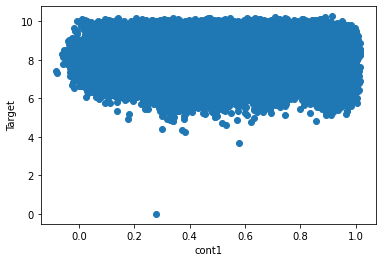

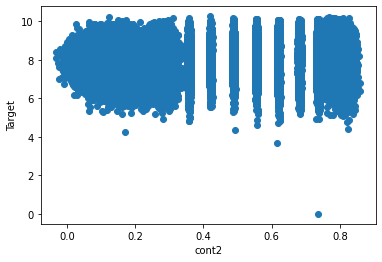

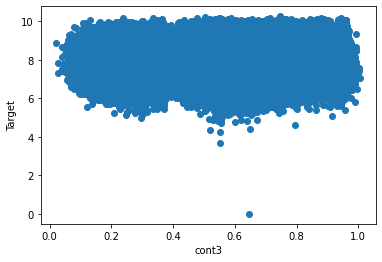

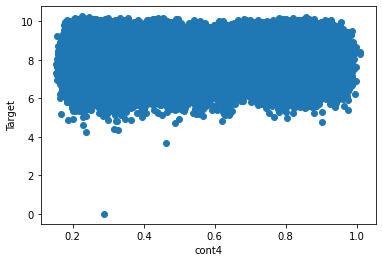

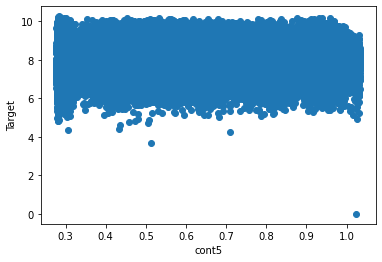

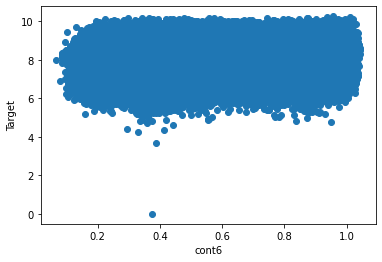

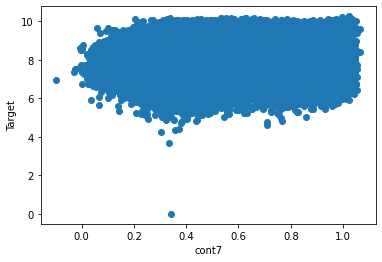

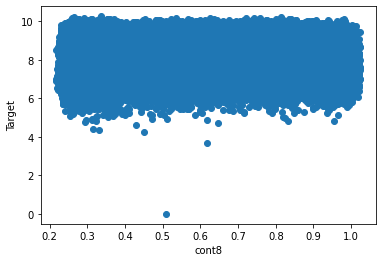

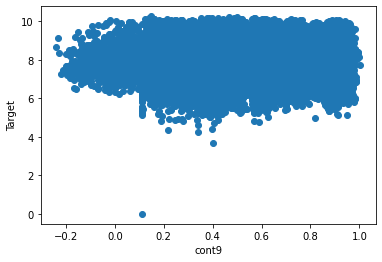

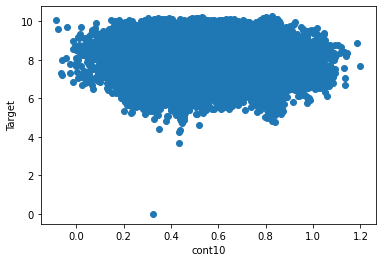

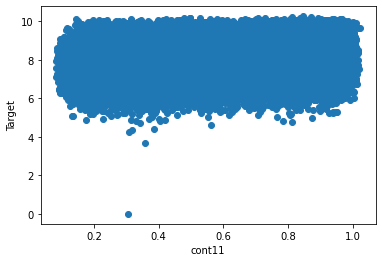

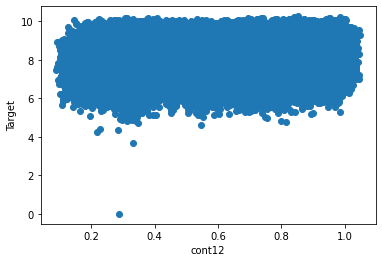

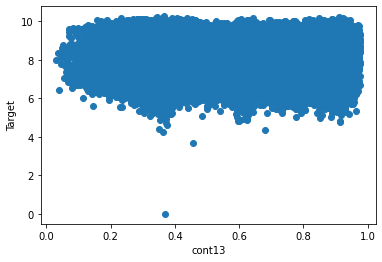

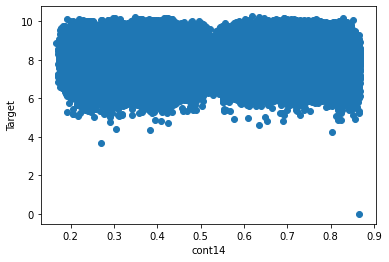

In [14]:
for i in data.columns[1:-1]:
    plt.scatter(data[i],data['target'])
    plt.xlabel(i)
    plt.ylabel('Target')
    plt.show()

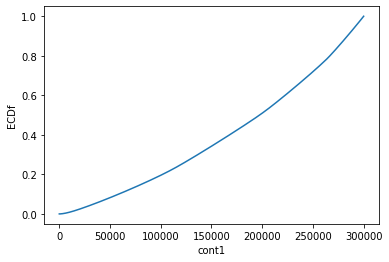

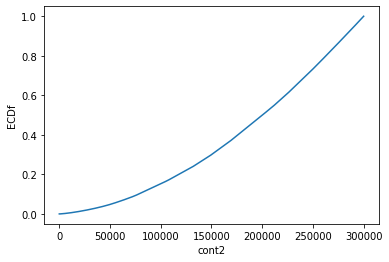

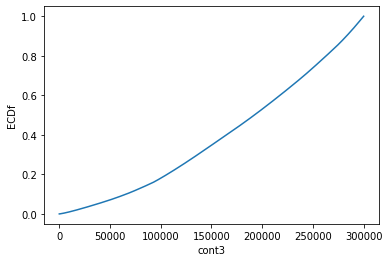

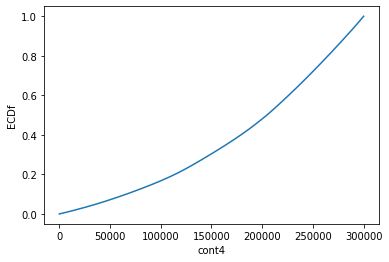

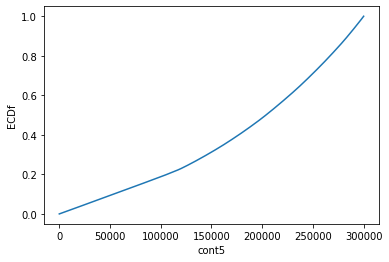

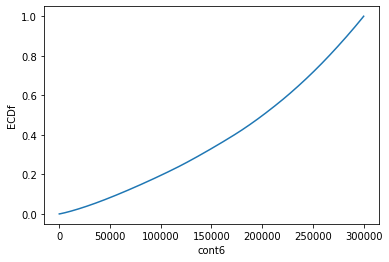

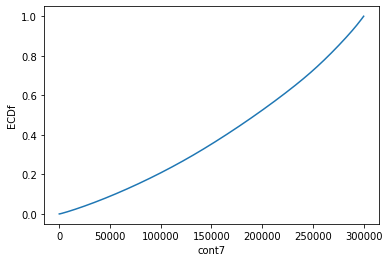

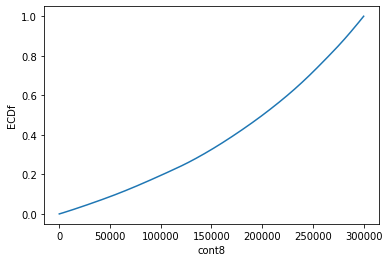

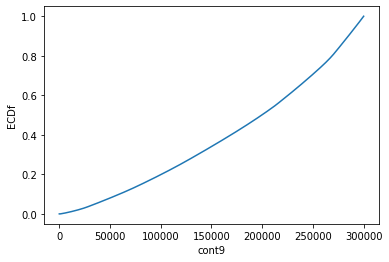

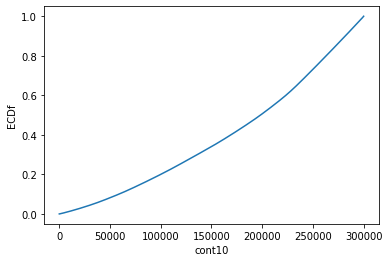

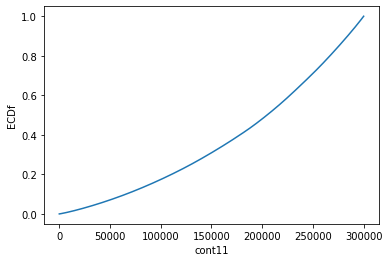

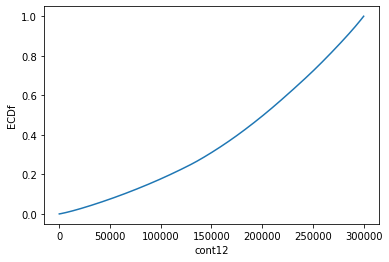

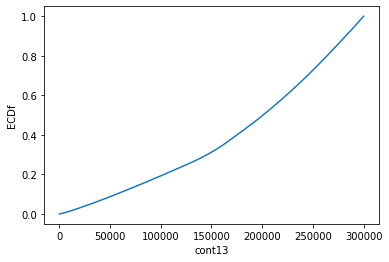

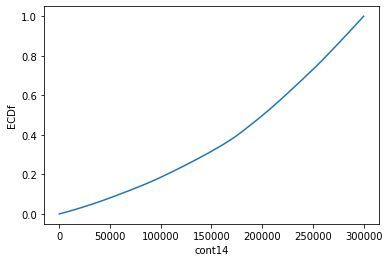

In [18]:
for i in data.columns[1:-1]:
    temp = data[i].sort_values().reset_index(drop=True)
    cdf = temp.cumsum()
    plt.plot(list(temp.index),cdf/cdf.max())
    plt.xlabel(i)
    plt.ylabel("ECDf")
    plt.show()

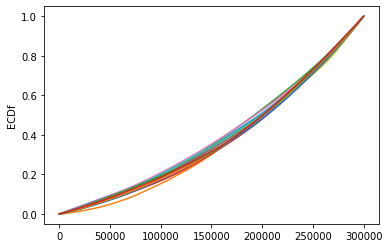

In [20]:
for i in data.columns[1:-1]:
    temp = data[i].sort_values().reset_index(drop=True)
    cdf = temp.cumsum()
    plt.plot(list(temp.index),cdf/cdf.max())
    plt.ylabel("ECDf")

In [39]:
import seaborn as sns

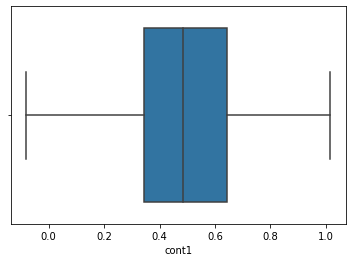

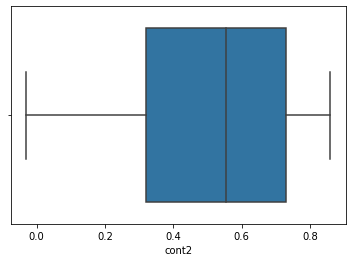

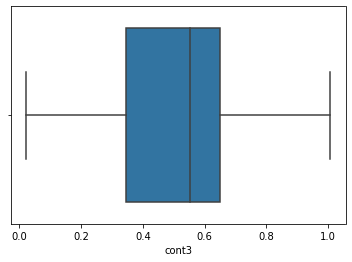

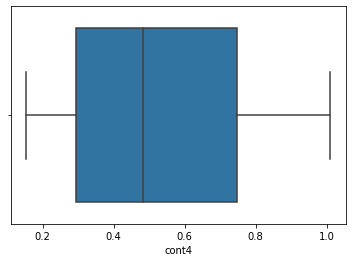

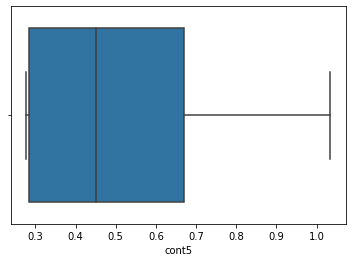

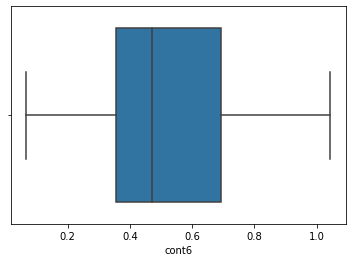

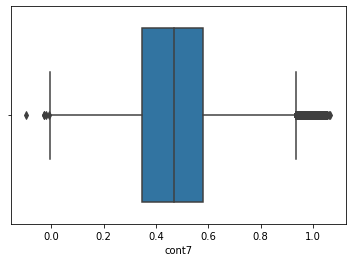

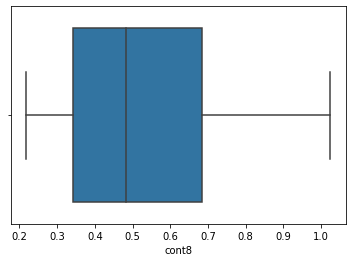

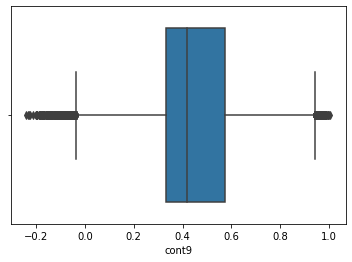

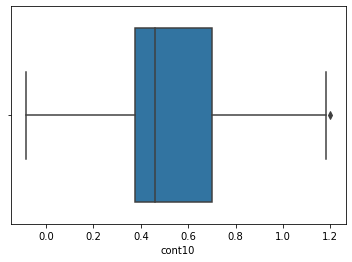

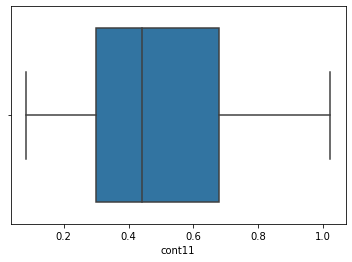

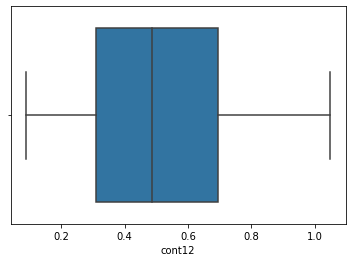

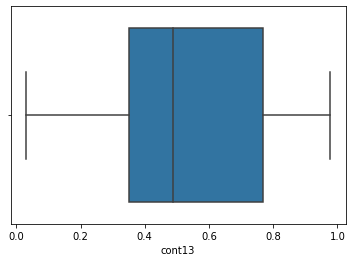

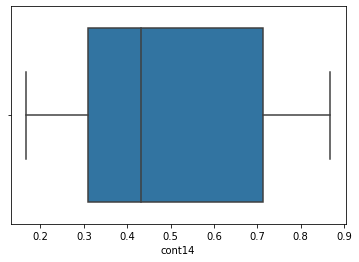

In [41]:
for i in data.columns[1:-1]:
    sns.boxplot(data[i])
    plt.show()

In [21]:
from sklearn.linear_model import LinearRegression

In [22]:
from sklearn.model_selection import train_test_split

In [25]:
data.head()

,id,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cont14,target
0,1,0.670390,0.811300,0.643968,0.291791,0.284117,0.855953,0.890700,0.285542,0.558245,0.779418,0.921832,0.866772,0.878733,0.305411,7.243043
1,3,0.388053,0.621104,0.686102,0.501149,0.643790,0.449805,0.510824,0.580748,0.418335,0.432632,0.439872,0.434971,0.369957,0.369484,8.203331
2,4,0.834950,0.227436,0.301584,0.293408,0.606839,0.829175,0.506143,0.558771,0.587603,0.823312,0.567007,0.677708,0.882938,0.303047,7.776091
3,5,0.820708,0.160155,0.546887,0.726104,0.282444,0.785108,0.752758,0.823267,0.574466,0.580843,0.769594,0.818143,0.914281,0.279528,6.957716
4,8,0.935278,0.421235,0.303801,0.880214,0.665610,0.830131,0.487113,0.604157,0.874658,0.863427,0.983575,0.900464,0.935918,0.435772,7.951046


In [26]:
data.iloc[:,1:-1].head()

,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cont14
0,0.670390,0.811300,0.643968,0.291791,0.284117,0.855953,0.890700,0.285542,0.558245,0.779418,0.921832,0.866772,0.878733,0.305411
1,0.388053,0.621104,0.686102,0.501149,0.643790,0.449805,0.510824,0.580748,0.418335,0.432632,0.439872,0.434971,0.369957,0.369484
2,0.834950,0.227436,0.301584,0.293408,0.606839,0.829175,0.506143,0.558771,0.587603,0.823312,0.567007,0.677708,0.882938,0.303047
3,0.820708,0.160155,0.546887,0.726104,0.282444,0.785108,0.752758,0.823267,0.574466,0.580843,0.769594,0.818143,0.914281,0.279528
4,0.935278,0.421235,0.303801,0.880214,0.665610,0.830131,0.487113,0.604157,0.874658,0.863427,0.983575,0.900464,0.935918,0.435772


In [36]:
x_train, x_test, y_train, y_test = train_test_split(data.iloc[:,1:-1], data.iloc[:,-1])

In [37]:
from sklearn.metrics import mean_squared_error

In [38]:
model = LinearRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
mean_squared_error(y_test, y_pred)

0.5267113380502193

In [42]:
test = pd.read_csv('data/test.csv')

In [43]:
test

,id,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cont14
0,0,0.353600,0.738780,0.600939,0.293377,0.285691,0.458006,0.620704,0.422249,0.369203,0.435727,0.550540,0.699134,0.286864,0.364515
1,2,0.907222,0.189756,0.215531,0.869915,0.301333,0.528958,0.390351,0.521112,0.794779,0.798580,0.446475,0.449037,0.916964,0.513002
2,6,0.179287,0.355353,0.623972,0.437812,0.282476,0.320826,0.386789,0.776422,0.222268,0.229102,0.211913,0.222651,0.327164,0.827941
3,7,0.359385,0.181049,0.551368,0.206386,0.280763,0.482076,0.506677,0.362793,0.379737,0.345686,0.445276,0.518485,0.299028,0.598166
4,10,0.335791,0.682607,0.676481,0.219465,0.282861,0.581721,0.748639,0.350158,0.448915,0.506878,0.817721,0.805895,0.790591,0.249275
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199995,499984,0.353856,0.677578,0.550852,0.869612,0.957635,0.255054,0.289138,0.635979,0.271399,0.282455,0.217169,0.219088,0.373261,0.272479
199996,499985,0.243209,0.135627,0.218393,0.792798,0.547639,0.433520,0.549540,0.650107,0.453787,0.459689,0.450424,0.511176,0.318334,0.395747
199997,499987,0.506973,0.683893,0.533434,0.192957,0.314381,0.358604,0.554455,0.267105,0.396101,0.445390,0.382656,0.397978,0.381235,0.369464
199998,499988,0.347870,0.553112,0.495284,0.861500,0.816914,0.298478,0.275964,0.265841,0.334250,0.252635,0.213589,0.285223,0.336772,0.388505


In [47]:
sub_y = model.predict(test.iloc[:,1:])

In [48]:
sub = pd.DataFrame({'id':test['id'],'target':sub_y})

In [49]:
sub

,id,target
0,0,8.056927
1,2,7.597695
2,6,7.952301
3,7,7.941761
4,10,8.068539
...,...,...
199995,499984,7.943169
199996,499985,7.973292
199997,499987,7.857372
199998,499988,7.940889


In [51]:
sub.to_csv('submission/submission1.csv',index=False)